<font color= 'orange'> Inverse Transform </font>

**Repository**: [![Inverse-Transform](https://img.shields.io/badge/Inverse_Transform-README.md-black?style=square&logo=github&logoColor=black)](https://github.com/EstebanMqz/Inverse-Transform)
<br><br>

### Exercise 1:
The time in which a Brownian motion remains above its maximum point in the interval [0,1] has a distribution $F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$.

#### <span style='color:lightbrown'> 1. MarcoSC08 </span><br>

**Inverse transformation**

If it solves: $u=\frac{2}{\pi}\sin^{-1}(\sqrt x)$

$arcsin(\sqrt x)=\frac{u\pi}{2}$

$arcsin(a)=b$ -> $a=sin(b)$ $\sqrt x=\sin(\frac{u\pi}{2})$

Solve for $x=\sin^{2}(\frac{\pi}{2}U)$


In [21]:
#libraries
from math import factorial as fac
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

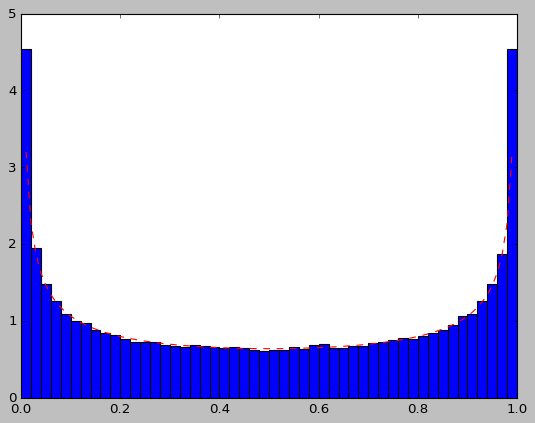

In [20]:
N=100
def funcion(N):
    y = (np.sin((np.random.random(N)*np.pi)/2))**2
    return y

x = np.arange(0,60,0.01)
y2 = 1/(np.pi*(np.sqrt(1-x)*np.sqrt(x)))

plt.plot(x,y2,'r--')

N = 100000
r1 = funcion(N)
plt.hist(r1,bins=50,density=True)
plt.show()

##### <span style='color:lightblue'> 1. EstebanMqz </span><br>

<div class="alert alert-block alert-info">

#### <b>Description</b>:

In this repository the [**Inverse-transform**](README.md#references) method is illustrated with $n=10000$ samplings for the following:

<b>1.</b> [*`CDF`*](README.md#References) $\rightarrow$ $F(x)$  = $\frac{2}{\pi}\sin^{-1}(\sqrt x)$

$$U = F^{-1}(X) = \sin^{2}(\frac{\pi}{2}X)$$

where $X~\sim U(a, b)$ is [***uniformly distributed***](README.md#references) by definition. 

<b>2.</b> [***Binomial distribution***](README.md#references) (<i>discrete</i>) with a [*`PMF`*](README.md#References) $X \sim B(X=k; n, p)$.

$$Pr(X=k;n,p) = \binom{n}{k} p^k (1-p)^{n-k}$$

where the binomial coefficient combinatorial of $k$ sucesses possible in $n$ trials $ { }_n C_k$ can be expressed as:
$$ { }_n C_k = \frac{n!}{k!(n-k)!}$$

And generalized to the $k + 1$ $\times$ $\frac{p}{1-p}$ ratio:

$$Pr(k+1;n,p) = \frac{n!}{(k+1)(k)!(n-k-1)!} p^{k+1} (1-p)^{n-k-1}$$

$$Pr(k+1;n,p) = \frac{n-k}{(k+1)(1-p)} p^{k+1} (1-p)^{n-k-1}$$

$$Pr(k+1;n,p) = \frac{n-k}{(k+1)(1-p)} p (p^k (1-p)^{n-k})$$

$\therefore$ the $p$ prob. of $k$ sucesses in $n$ trials $\times$ their ratio is:

$$Pr(k+1;n,p) = \frac{(n-k) p}{(k+1)(1-p)} Pr(k;n,p)$$

<i>Samplings made with [`numpy.random.random`](README.md#references) & [`numpy.random.binomial`](README.md#references), validated with `matplotlib`.</i>

$\pi$

C:\Users\Esteban\AppData\Local\Temp\ipykernel_11160\1785188603.py:72: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "legend" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('images/Sin.jpg', legend = True, dpi = 300, format = 'jpg')


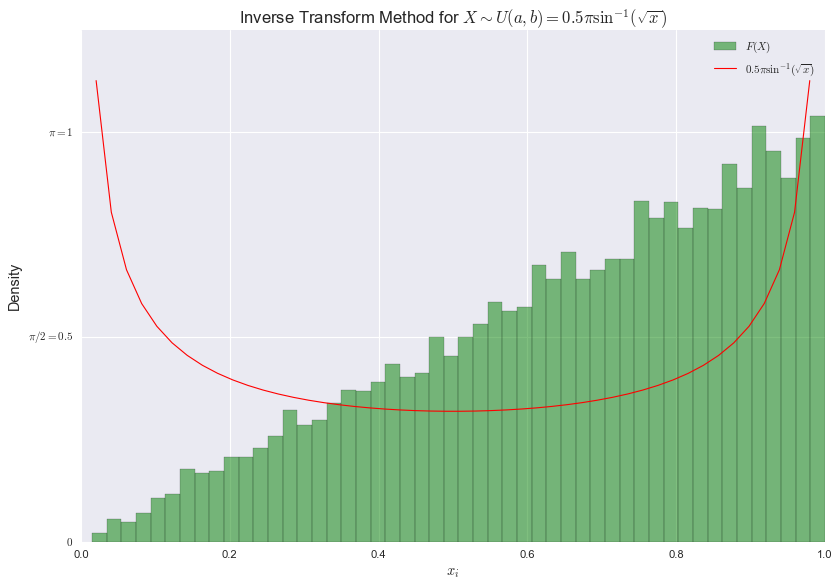

In [103]:
n=10000

def function(n):
    {"""Function to generate random X = x [1,n] random realizations for f(x) = sin^2(πx/2).
     
    Parameters
    ----------
    n : int
        n samples,
    Returns
    -------
    X : np.array
        Random variable with n realizations on x.
    """}
    if n < 0:
        raise ValueError('n must be non-negative')
    if n > 1:
        return (np.sin((np.pi/2)*np.random.rand(n)))**2
    else:
        return 0

def inverse_function(f):
    {"""Function to generate the inverse function for x F(x) = 2π arcsin(√x) which is simply the 
     
    Parameters
    ----------
    f : array_like
        Array of random numbers
    Returns
    -------
    g : array_like
        Array of random numbers from a given f(x).
    """}
    return np.sqrt(f)

def random_data(n):
    {"""Generate n random numbers between a = 0 and b = 1 for X ~ U(0,1).
    Parameters
    ----------
    n : int
        Number of random numbers
    Returns
    -------
    f : array_like
        Array of random numbers
    """}
    return np.random.random(n)

def plot_comparison(f, g):
    {"""Comparison plots between the f(x) and its inverse.
    Parameters
    ----------
    f : array_like
        Array of random numbers
    g : array_like
        Array of random numbers from a given f(x).
    Returns
    -------
    + plt.show():
        plots of f(x) and its inverse in the same figure.
    """} 

    plt.style.use('seaborn')
    plt.figure(figsize = (12, 8)) 
    plt.hist(f, bins = 50, label = '$F(X)$', density = True, color='green', alpha=0.5, edgecolor='black')
    x = np.linspace(0,1) 
    y = lambda x: 1/(np.pi*(np.sqrt(1-x)*np.sqrt(x)))
    plt.plot(x,y(x),'k',lw = 1, label = '$0.5\pi \sin^{-1}(\sqrt{x})$', color='red') 
    plt.title("Inverse Transform Method for $X \sim U(a,b) = 0.5\pi \sin^{-1}(\sqrt{x})$", fontsize= 15) 
    plt.ylabel('Density', fontsize= 13)
    plt.yticks([0, 1, 2], ['$0$', '$\pi/2=0.5$', '$\pi=1$'])
    plt.savefig('images/Sin.jpg', legend = True, dpi = 300, format = 'jpg')

    #How do i add legends to savefig?
    #To add the legend to the saved image, you can use the bbox_inches='tight' argument of the savefig function:
    #plt.savefig('images/Sin.jpg', legend = True, dpi = 300, format = 'jpg', bbox_inches='tight')
    #It's not displaying its legends.


    plt.xlabel('$x_i$', fontsize= 13)
    plt.legend()
    plt.show() 

if __name__ == '__main__':
    f = random_data(n)
    g = inverse_function(f)
    plot_comparison(g, f)

f = function(n)

#### 2. Discrete Random Variable Generation<br>
$x$~$B(n,p)$ models successes out of n independent trials where there is a probability $p$ of success on each trial.
Generate a binomial random variable with parameters $n=10$ and $p=0.7$.<br>
$X\sim binomial(n,p) \longrightarrow p_k=P(X=k)=\frac{n!}{i!(n-k)!}p^k(1-p)^{n-k} ,\quad k={0,1,\cdots,n}$.<br>
By properties of the factorial operation the previous $p_k$ can be written as:<br>
$p_{k+1}=\frac{n-k}{k+1}\frac{p}{1-p} p_k $

#### <span style='color:lightbrown'> 2. MarcoSC08 </span><br>

In [8]:
# student solution code 1
def Gen_discrete_distr(U:'vector of random numbers',
                       p_acum: 'Cumulative P. of the distribution to generate'):
    v = np.array(list(map(lambda j:sum(1 for i in p_acum if i<U[j]),range(N))))
    return v

def plot_histogram_discrete(distribution:'distribution to plot histogram',
                            label:'label of the legend'):
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribution,bins = len(set(distribution))) 
    plt.bar(list(set(distribution)),y,label=label)
    plt.legend()
    plt.show()

def P_accum_Binomial(n,p):
    c = p/(1-p)
    pr = [(1-p)**n]
    add = pr.append
    for i in range(n+1):
        add((c*(n-i)/(i+1))*pr[-1])
    return np.cumsum(pr)

def P_accum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
            
    [pr(i) for i in range(n-1)] 
    return np.cumsum(Pr)

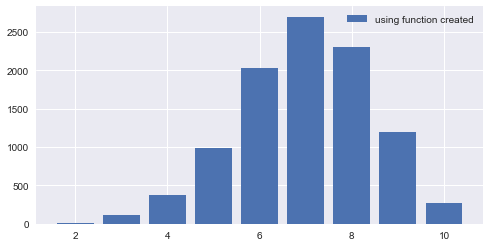

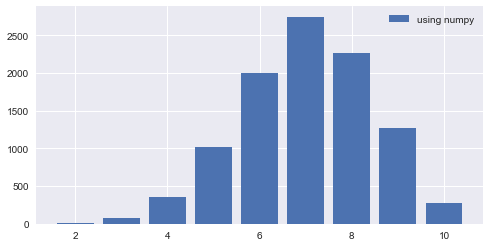

In [9]:
n=10; p = 0.7; N = 10**4

p_acum = P_accum_Binomial_o(n,p)
u = np.random.rand(N)

d_binomial = Gen_discrete_distr(u,p_acum)
plot_histogram_discrete(d_binomial,'using function created')

d_bino_numpy = np.random.binomial(n,p,N)
plot_histogram_discrete(d_bino_numpy,'using numpy')

##### <span style='color:lightblue'> 2. EstebanMqz </span><br>

<a name = 2-estebanmqz></a>

For the probability $p = 0.7$ of $k = {0,1,2,..,10}$ successes in $n = 10$ trials with $X=10000$ samplings, the following is obtained:

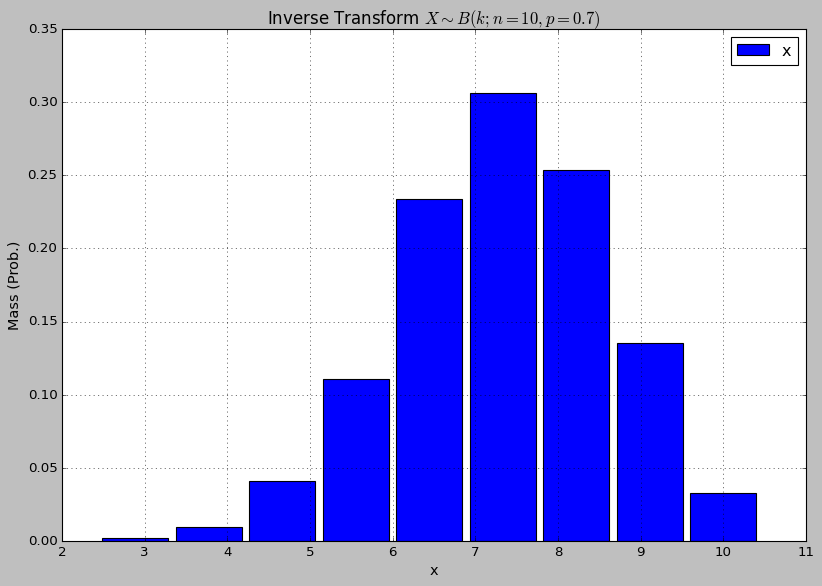

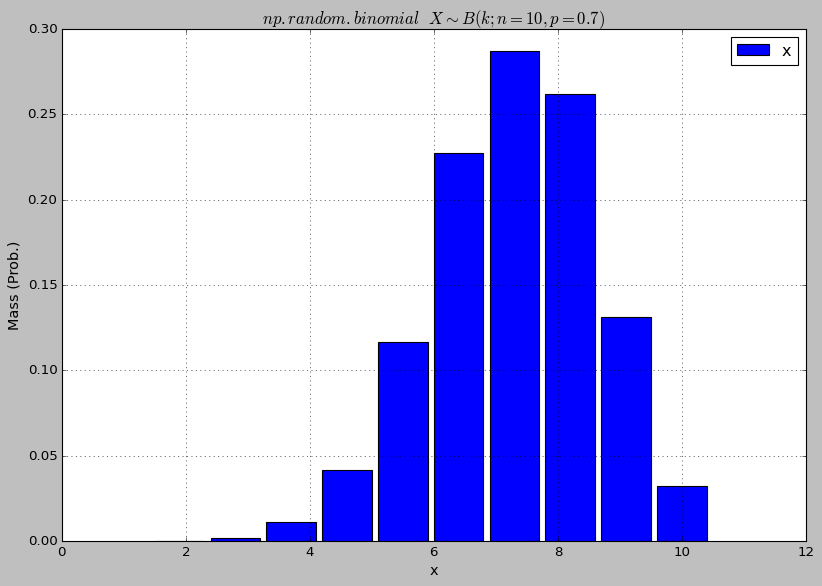

In [107]:
def inverse(n,p,N):
    {'''
    Binomial function by with its pmf: ((p/(1-p))*(n-i)/(i+1))*pi.
    Parameters:
    -------
    n: number of trials
    p: probability of success
    N: number of random numbers
    Returns:
    -------
    + inv: numpy.ndarray
        array of random numbers generated from the Inverse Transform Method.
    '''}

    def accum():
        pk = np.zeros(n) 
        pk[0] = (1-p)**n 
        def p_n(i): 
            nonlocal pk 
            pk[i+1]=((p/(1-p))*(n-i)/(i+1))*pk[i] 
        [p_n(i) for i in range(n-1)] 
        return pk.cumsum() 
    p_cum = accum() 
    u = np.random.rand(N) 
    inv = np.array(list(map(lambda z:sum(1 for i in p_cum if i<u[z]),range(N))))
    return inv

def discrete_histogram(dist):
    {'''
    Function to plot the histogram of the generated discrete function. It receives the discrete distribution f(x).
    Parameters:
    -------
    + dist: np.array
        Array of random numbers generated from the Inverse Transform Method.
    Returns:
    -------
    + plt.show(): 
        Histogram of the generated discrete function.
    
    '''}
    y,x = np.histogram(dist,bins = len(set(dist)),density = True)
    plt.style.use('classic')
    plt.bar(x[1:],y)
    plt.legend("x")
    plt.show()

n = 10
p = 0.7
N = 10000

plt.style.use('classic')

inv = inverse(n,p,N)
plt.figure(figsize = (12, 8)) 
plt.ylabel('Mass (Prob.)', fontsize= 13)
plt.xlabel('x', fontsize= 13)
plt.title('Inverse Transform $X\sim B(k;n=10,p=0.7)$', fontsize= 15)
plt.grid()
discrete_histogram(inv)

plt.figure(figsize = (12, 8)) 
plt.ylabel('Mass (Prob.)', fontsize= 13)
plt.xlabel('x', fontsize= 13)
plt.title('$np.random.binomial$  $X\sim B(k;n= 10, p= 0.7)$', fontsize= 15)
plt.grid()
discrete_histogram(np.random.binomial(n,p,N))